In [1]:
# Do imports
%matplotlib qt

from mne import Epochs, pick_types, find_events
from mne.io import concatenate_raws, read_raw_edf
from mne.datasets import eegbci

## Example Data

EEGBCI is a dataset of EEG data, with subjects doing 

Without getting into the details of motor imagery classification, we can start with their rest data, and then treat their data like normal task data. 

In [3]:
# Check out the load data function. Returns file paths to load data
eegbci.load_data

<function mne.datasets.eegbci.eegbci.load_data>

In [4]:
# Lets get the first subjects data, the eyes closed resting block
ec_f_name = eegbci.load_data(1, [1, 2, 3])  # <- Get a list of paths to requested data

Using default location ~/mne_data for EEGBCI...

[........................................] 100.00000 - (1.2 MB / 1.2 MB)   
Do you want to set the path:
    C:\Users\Luyanda Mdanda\mne_data
as the default EEGBCI dataset path in the mne-python config [y]/n? y
Attempting to create new mne-python configuration file:
C:\Users\Luyanda Mdanda\AppData\Roaming\.mne\mne-python.json

[........................................] 100.00000 | (1.2 MB / 1.2 MB)   

[........................................] 100.00000 - (2.5 MB / 2.5 MB)   


In [5]:
# Load some data from the first subject

ec_dat = read_raw_edf(ec_f_name[0], preload=True)
#eo_dat = read_raw_edf(ec_f_name[1], preload=True)
motor_dat = read_raw_edf(ec_f_name[2], preload=True)

Extracting edf Parameters from C:\Users\Luyanda Mdanda\mne_data\MNE-eegbci-data\physiobank\database\eegmmidb\S001\S001R01.edf...
Setting channel info structure...
Creating Raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Ready.
Extracting edf Parameters from C:\Users\Luyanda Mdanda\mne_data\MNE-eegbci-data\physiobank\database\eegmmidb\S001\S001R03.edf...
Setting channel info structure...
Creating Raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Ready.


In [8]:
# Have a quick look at the info - for eyes closed data
ec_dat.info

<Info | 17 non-empty fields
    bads : 'list | 0 items
    buffer_size_sec : 'float | 1.0
    ch_names : 'list | Fc5., Fc3., Fc1., Fcz., Fc2., Fc4., Fc6., C5.., C3.., ...
    chs : 'list | 65 items (EEG: 64, MISC: 1)
    comps : 'list | 0 items
    custom_ref_applied : 'bool | False
    dev_head_t : 'mne.transforms.Transform | 3 items
    events : 'list | 0 items
    filename : 'str | C:\Users\L.../S001R01.edf
    highpass : 'float | 0.0 Hz
    hpi_meas : 'list | 0 items
    hpi_results : 'list | 0 items
    lowpass : 'float | 80.0 Hz
    meas_date : 'int | 1250093700
    nchan : 'int | 65
    projs : 'list | 0 items
    sfreq : 'float | 160.0 Hz
    acq_pars : 'NoneType
    acq_stim : 'NoneType
    ctf_head_t : 'NoneType
    description : 'NoneType
    dev_ctf_t : 'NoneType
    dig : 'NoneType
    experimenter : 'NoneType
    file_id : 'NoneType
    hpi_subsystem : 'NoneType
    kit_system_id : 'NoneType
    line_freq : 'NoneType
    meas_id : 'NoneType
    proj_id : 'NoneType
    pro

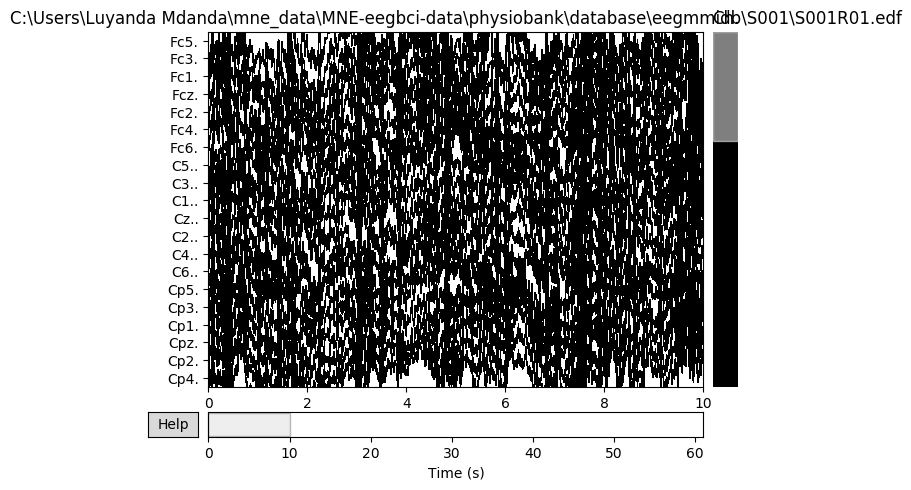

In [10]:
# Plot the eyes-closed (should open interactive viz - can scroll through)
ec_dat.plot()

In [7]:
ec_dat.ch_names


['Fc5.',
 'Fc3.',
 'Fc1.',
 'Fcz.',
 'Fc2.',
 'Fc4.',
 'Fc6.',
 'C5..',
 'C3..',
 'C1..',
 'Cz..',
 'C2..',
 'C4..',
 'C6..',
 'Cp5.',
 'Cp3.',
 'Cp1.',
 'Cpz.',
 'Cp2.',
 'Cp4.',
 'Cp6.',
 'Fp1.',
 'Fpz.',
 'Fp2.',
 'Af7.',
 'Af3.',
 'Afz.',
 'Af4.',
 'Af8.',
 'F7..',
 'F5..',
 'F3..',
 'F1..',
 'Fz..',
 'F2..',
 'F4..',
 'F6..',
 'F8..',
 'Ft7.',
 'Ft8.',
 'T7..',
 'T8..',
 'T9..',
 'T10.',
 'Tp7.',
 'Tp8.',
 'P7..',
 'P5..',
 'P3..',
 'P1..',
 'Pz..',
 'P2..',
 'P4..',
 'P6..',
 'P8..',
 'Po7.',
 'Po3.',
 'Poz.',
 'Po4.',
 'Po8.',
 'O1..',
 'Oz..',
 'O2..',
 'Iz..',
 'STI 014']

Effective window size : 12.800 (s)


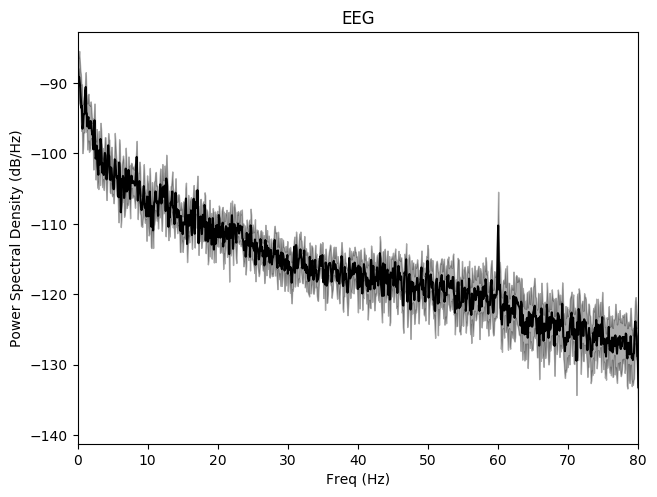

In [11]:
# Have a look at the PSD
ec_dat.plot_psd()

In [13]:
# Check out epoched data object
Epochs

mne.epochs.Epochs

In [14]:
# Pull out events
events = find_events(motor_dat, stim_channel='STI 014')

Removing orphaned offset at the beginning of the file.
29 events found
Events id: [1 2 3]


In [15]:
# Pick-types extracts the desired channels - here extract eeg chans, ignore stim channel, etc. 
chans = pick_types(motor_dat.info, meg=False, eeg=True, stim=False, eog=False, exclude='bads')

In [17]:
# Settings for extracting segments of data around the events of interest
t_min, t_max = -0.5, 3
event_id = dict(hands=3, feet=3)

# Extract epochs
epochs = Epochs(motor_dat, events, event_id, t_min, t_max, proj=False, picks=chans, baseline=None, preload=True, add_eeg_ref=False)

7 matching events found
No baseline correction applied
Loading data for 7 events and 561 original time points ...
0 bad epochs dropped


In [18]:
# Average over all 
evoked = epochs.average()

In [22]:
epochs?

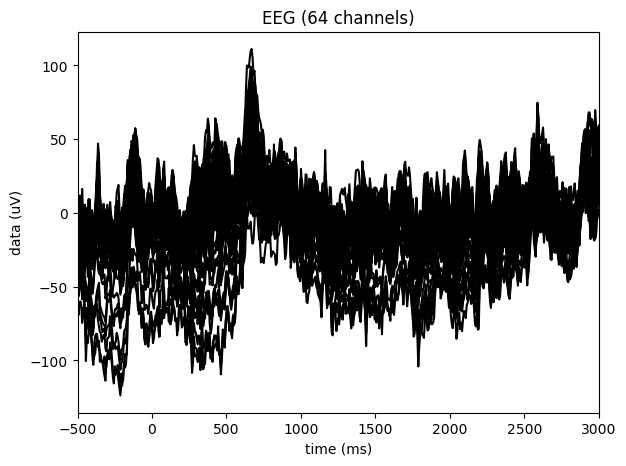

In [20]:
# Look at event-related (averaged) potential - this is typically called an ERP
# In this case, perhaps most noticeable the brain seemd to get more 'positive' about 600 ms after the movement
evoked.plot()